<a href="https://colab.research.google.com/github/MananShukla7/TensorFlow-NLP/blob/main/01_intro_tf_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intoduction to NLP Fundamentals in TensorFlow

NLP is used to make sense of the textual data with not so textual methods!
THings like tokenization,embeddings etc are used

In [1]:
## Check for CPU


In [2]:
!nvidia-smi -L


/bin/bash: nvidia-smi: command not found


In [3]:
#Import helper func


#Get a text dataset

The dataset that we are using is kaggles intro to nlp dataset
(Tweets wether they are disaster or not disaster).config/

Source-https://www.kaggle.com/c/nlp-getting-started

In [4]:

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-05-25 18:28:18--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.009s  

2023-05-25 18:28:18 (61.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
import zipfile
def unzip_data(filename):
  zip_ref=zipfile.ZipFile(filename,"r")
  zip_ref.extractall()
  zip_ref.close()


In [6]:
#Ubzip data
unzip_data("/content/nlp_getting_started.zip")

In [7]:
import pandas as pd
df=pd.read_csv("/content/train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
df.shape

(7613, 5)

In [9]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [10]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
df_shuffle=df.sample(frac=1,random_state=42)
df_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [14]:
#HOw many examples of each class are there
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
df.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [16]:
test_df=pd.read_csv("/content/test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#Visualizing a text dataset

In [17]:
#How many total samples??
len(df),len(test_df)

(7613, 3263)

In [18]:
class_names=["not a real disaster","real disaster"]

#Lets visualize some random training examples!

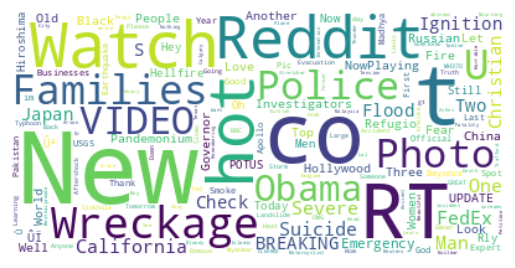

In [19]:
#Creating the world could of tweets
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(cat.split()[0] for cat in df.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import random 
i=0
random_index=random.randint(0,len(df)-5)
for row in df_shuffle[["text","target"]][i:i+10].itertuples():
  _,text,target=row
  print(f"Target:{target}","{real disaster}" if target>0 else "{Not real disaster}")
  print(f"Text:\n{text}\n")
  print("---\n")
  


Target:1 {real disaster}
Text:
So you have a new weapon that can cause un-imaginable destruction.

---

Target:0 {Not real disaster}
Text:
The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@

---

Target:1 {real disaster}
Text:
DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q

---

Target:0 {Not real disaster}
Text:
Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.

---

Target:0 {Not real disaster}
Text:
in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3

---

Target:0 {Not real disaster}
Text:
@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time

---

Target:1 {real disaster}
Text:
my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am 

###Split into training and validation sets


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(df_shuffle['text'].to_numpy(),df_shuffle['target'].to_numpy(),test_size=0.1,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((6851,), (762,), (6851,), (762,))

In [22]:
X_train[:10],y_train[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

##Converting text into numbers

When dealing with a text problem, one od the first things is to convert text to numbers.

There area few ways to do this, namely:
- Tokenization - direct mapping of token(a token could be a word or a character) to number

- Embedding- create a embedding layer that will create a dense and small matrix with feature vector for each word or character
we can create a feature vector of man gamti size

##Text vectorization (tokenization)

In [23]:
X_train[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorization=TextVectorization(max_tokens=10000,#None gives error when pad_to+max set to none
                                     standardize="lower_and_strip_punctuation",
                                     split="whitespace",
                                     ngrams=None ,#Create group of n words if none then treats each word on its own
                                     output_mode="int",
                                     output_sequence_length=None, #Pads the all sentences to longest tweets! none means does it to the max length of sentence is value like 8 is set then pads 8 0s to the sentence!!
                                     pad_to_max_tokens=True 
                                     )


In [25]:
#FInd the avg number of tokens in the training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

15

In [26]:
#Setup the text vectorization variable
max_vocab_length=10000
max_length=15

text_vectorization=TextVectorization(max_tokens=max_vocab_length,
                                     output_mode="int",
                                     output_sequence_length=max_length)

In [27]:
#adapt==fit
text_vectorization.adapt(X_train)

In [28]:
sample_sentence="There's a flood on my street ahhh!!"
text_vectorization([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,  11,  13, 698,   1,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [29]:
#Choose trandom samples from training dataset and tokenize it.
random_sentence=random.choice(X_train)
print(f"Sentence is : {random_sentence}\n")
v=text_vectorization(random_sentence)
v

Sentence is : Casualty Team: Ice Cream Recall Sends Chill Through Food Industry http://t.co/6GsAmY6mts



<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([ 712,  697, 1515, 2507, 2757, 3432, 3109,  295,  260, 1513,    1,
          0,    0,    0,    0])>

In [30]:
#Get the unique words in the vocabulary
words_in_the_vocab=text_vectorization.get_vocabulary()
top_5_words=words_in_the_vocab[:5]
bottom_5_words=words_in_the_vocab[-5:]
print(f"top 5 words: {top_5_words}")
print(f"least 5 words: {bottom_5_words}")
print(f"total words: {len(words_in_the_vocab)}")

top 5 words: ['', '[UNK]', 'the', 'a', 'in']
least 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']
total words: 10000


In [31]:
words_in_the_vocab[:5]

['', '[UNK]', 'the', 'a', 'in']

###Creating the embedding
turns a positive integer matrix to dense float matrix
To make our embedding we are going to use the tf embedding layer

The parameter that we care most about for our embedding layer:
- `input_dim`=THe size of our vocab_length

- `output_dim`=THe o/p size of our embedding layer 100 the 100 dims

- `input_lenght`= Length of the sequence being passed to the embedding layer

In [32]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocab_length, #10000
                 output_dim=128,
                 input_length=max_length)#15
            

In [33]:
random_sentence=random.choice(X_train)
vectorized=text_vectorization(random_sentence)
embedded=embedding(vectorized)
print(f"Original Sentence: {random_sentence}")
print(f"Vectorized Sentence: {vectorized}")
print(f"Word embedded sentence:\n {embedded}")

Original Sentence: 8 hours of bagging groceries = an aching body
Vectorized Sentence: [589 683   6 490   1  39   1  83   0   0   0   0   0   0   0]
Word embedded sentence:
 [[ 0.02022367 -0.03092543 -0.04387946 ...  0.02532697 -0.04364404
   0.02186017]
 [-0.03741477 -0.00206113  0.03668645 ... -0.03231697 -0.032449
   0.04439846]
 [-0.03105426 -0.00156447  0.01359756 ...  0.002635    0.0362714
   0.00894921]
 ...
 [ 0.00185794 -0.04576762 -0.00687983 ...  0.04345343 -0.02254896
  -0.04930561]
 [ 0.00185794 -0.04576762 -0.00687983 ...  0.04345343 -0.02254896
  -0.04930561]
 [ 0.00185794 -0.04576762 -0.00687983 ...  0.04345343 -0.02254896
  -0.04930561]]


In [34]:
#CHeck out  a single token's embedding

embedded[0][0],embedded.shape,random_sentence

(<tf.Tensor: shape=(), dtype=float32, numpy=0.020223666>,
 TensorShape([15, 128]),
 '8 hours of bagging groceries = an aching body')

#Modelling experiments on our dataset

Now we've a got a way to turn our text sequence into tthe numbers, its time to start
building a series of modelling experiments

We will build and train following models:

* Model 0: Naive Bayed(baseline), (from sklearn)
* Model 1: Feed-forward neural network(dense model or linear in pytorch)
* Model 2:LSTM model(RNN)
* Model 3:GRU(RNN)
* Model 4:Bi-directional LSTM model(RNN)
* Model 5 :1D Convo NN
* Model 6: Tensorflow hub pretrained Feature extractor(using the transfer learing for nlp)
* Model 7:Same as the model 6 but with the 10 percent of the data

How are we going to approach all this??

* Create a model
* Build a model
* FIt a model
* Evaluate a model
* Predict based on the model!!

##Building a baseline model (Model 0)

---
As with all the ml modelling a=experiments ,we need to create a baseline to compare latter models with and get better idea about the working!!

> **NOTE:** Very common to use non dl models to use as baseline coz of the speed and then later using the dl to see if we can improve upone them!!


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics


In [36]:
tf_vectorize=CountVectorizer()
X_train_tf=tf_vectorize.fit_transform(X_train)
X_train_tf.shape

(6851, 20076)

In [37]:
X_val_tf=tf_vectorize.transform(X_val)

In [38]:
X_test_tf=tf_vectorize.transform(test_df['text'])

In [39]:
tfidfVectorize=TfidfVectorizer()
X_train_idf=tfidfVectorize.fit_transform(X_train)
X_train_idf.shape

(6851, 20076)

In [40]:
bayesian=MultinomialNB()
bayesian.fit(X_train_tf,y_train)

MultinomialNB()

###Evaluating model using the validation set

In [41]:
y_val_pred_0=bayesian.predict(X_val_tf)

In [42]:
metrics.confusion_matrix(y_val,y_val_pred_0)

array([[370,  44],
       [103, 245]])

In [43]:
tf_score=bayesian.score(X_val_tf,y_val) ##Approx 80 percent accuracy!
tf_score

0.8070866141732284

In [44]:
def check_val(y_val,y_pred):
  from numpy import random
  samples=random.randint(0,len(y_val),size=[10])
  for sample in samples:
    print(f"Tweet: {test_df.iloc[sample,3]} \n the pred is:{class_names[y_pred[sample]]} | the actual value is: {class_names[y_val[sample]]}\n")

In [45]:
check_val(y_val,y_val_pred_0)

Tweet: I might go losing it n drive off a cliff fall in the void 
 the pred is:real disaster | the actual value is: real disaster

Tweet: Oh I see we are now tied?  Sweet!  It's all in the Blizzard 
 the pred is:not a real disaster | the actual value is: real disaster

Tweet: @sar_giuliani I'm currently burning my skin off?? 
 the pred is:real disaster | the actual value is: real disaster

Tweet: Bruh this sex on the beach??is bomb as fuck yo 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: PLUS PERFORMANCE CHIP FUEL SAVER CHEVY SILVERADO/AVALANCHE/BLAZER/TAHOE http://t.co/eocKbeOGm0 http://t.co/cvjCidgEZ7 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: burned 163 calories doing 30 minutes of Total Body Cardio #21dayfix #myfitnesspal 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: Deck building of my 4 year old daughter http://t.co/INnY1ANTam 
 the pred is:not a real disaster |

###Making predictions on the test data

In [46]:
y_pred_0=bayesian.predict(X_test_tf)

In [47]:
y_pred_0[0]

1

In [48]:
test_df.iloc[0,3]

'Just happened a terrible car crash'

In [49]:
def check_pred(y_pred):
  from numpy import random
  samples=random.randint(0,len(y_pred),size=[10])
  for sample in samples:
    print(f"Tweet: {test_df.iloc[sample,3]} \n the pred is:{class_names[y_pred_0[sample]]}\n")


In [50]:
check_pred(y_pred_0)

Tweet: I'm falling to pieces and I won't be whole until you let me in ? Heroine by Sleeping With Sirens ÛÓ https://t.co/tQxLQUKq7z 
 the pred is:not a real disaster

Tweet: Swansea ?plot hijack transfer move for Southampton target Virgil van Dijk? http://t.co/UOq87SP5JP 
 the pred is:real disaster

Tweet: #WAwildfire in #chelan? Wolverine fire results in evacuation. http://t.co/yePlnZPoWu 
 the pred is:real disaster

Tweet: U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... https://t.co/ZhXua8kmae via @Change 
 the pred is:real disaster

Tweet: .@denisleary Not sure how these folks rush into burning buildings but I'm grateful they do. #TrueHeroes 
 the pred is:not a real disaster

Tweet: So it doesn't mean inundated with tweets? @Dictionarycom's #WordoftheDay - twitterpated http://t.co/pxoQ1TRXqr #UseYourWords #author #writer 
 the pred is:not a real disaster

Tweet: Turkish troops killed in Kurdish militant 'suicide attack' http://

####using the tfidf vectorizer now with pipeline

In [51]:
#THE EASY WAY
from sklearn.pipeline import Pipeline
idf_model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
idf_model_0.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [52]:
idf_score=idf_model_0.score(X_val,y_val)
idf_score

0.7926509186351706

In [53]:
#Since tf score is greayer thaan the idf score then keep it as baseline
baseline_score=tf_score

##Making the predictions on idf vals


In [54]:
y_idf_pred_0=idf_model_0.predict(test_df['text'])

In [55]:
check_pred(y_idf_pred_0)

Tweet: #NowPlaying  - Lamb of God - Desolation http://t.co/mUYWttEdl6 
 the pred is:not a real disaster

Tweet: so privileged and proud to wear this uniform.?? #NHS #Ambulance #GayUK #Uniform #Proud #Privileged #WhatsYourEmergency http://t.co/0BkmuhYSFx 
 the pred is:not a real disaster

Tweet: No storm lasts forever the dust must settle truth will prevail. http://t.co/1cjyfY8iXj 
 the pred is:real disaster

Tweet: @gilmanrocks7 ya it was. Damn forest fires. 
 the pred is:real disaster

Tweet: @EddieTrunk Blizzard of Ozz 
 the pred is:not a real disaster

Tweet: Hey! How are you? 
 the pred is:not a real disaster

Tweet: Anger is an acid that can do more harm to the vessel in which it is stored than to anything on which it is poured ~http://t.co/UTiGx9PSry 
 the pred is:not a real disaster

Tweet: China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/eKO50hD5Gz #market 
 the pred is:not a real disaster

Tweet: However piece of virtu site fixing bath give the gate displa

In [56]:
##idf validation
y_idf_val_pred=idf_model_0.predict(X_val)

In [57]:
print(metrics.classification_report(y_val,y_idf_val_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



In [58]:
print(metrics.classification_report(y_val,y_val_pred_0))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       414
           1       0.85      0.70      0.77       348

    accuracy                           0.81       762
   macro avg       0.81      0.80      0.80       762
weighted avg       0.81      0.81      0.80       762



#Badhama yes predictions maathi ketla saacha yes che?? precision Ratio b/w true positive and all positive
#Badha yes maathi aapde ketla saacha predict krya che

#a fishnet with wide net catches 80 fishes and 80 rocks
#that means 80 percent recall and 50 precision
#jetla true aaya ema thi ketla saacha che ane ketla khota che - precision

#using a smaller net we get 20 fishes but no rocks 
#that means 20 percent recall and 100 percent precision
#ketla saacha  yes  che ane ketla saacha yes ne khoti rite no ma classify kriya che

#KEtla saacha ne khota ma krya che - recall
#ketla saacha ma thi bhulthi khota aai gaya che -precision

###create a function for the classification report!

- Accuracy 
- Recall 
- precision
- f1 score

In [59]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calc_results(y_true,y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary
  classification model.
  """

  #Classification model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  #Calc the model precision recall and f1 score 
  model_precision,model_recall,model_f1score, _ =precision_recall_fscore_support(y_true,y_pred,average="weighted")
  return {"accuracy":model_accuracy,
              "precision":model_precision,
              "recall":model_recall,
              "f1-score":model_f1score}
  

In [60]:
baseline_results=calc_results(y_val,y_val_pred_0)
baseline_results

{'accuracy': 80.70866141732283,
 'precision': 0.8121588991665515,
 'recall': 0.8070866141732284,
 'f1-score': 0.8045685816460524}

##Model 1: Linear ANN Model 

In [61]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py

--2023-05-25 18:28:26--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2023-05-25 18:28:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-25 18:28:26 (58.4 MB/s) - ‘helper_func

In [62]:
#Create a tensorboard callback(need to create a new one for each model)
from helper_functions import create_tensorboard_callback



#Create a directory to save TensorBoard logs
SAVE_DIR="model_logs"

In [63]:
from math import e
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)#Create a embedding on numberized inputs
x = layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)#create a op layer
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")


In [64]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [65]:
 #Compile model
model_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [66]:
model_1_history=model_1.fit(x=X_train,
                            y=y_train,
                            epochs=5,
                            validation_data=(X_val,y_val),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,experiment_name="model_1")])

Saving TensorBoard log files to: model_logs/model_1/20230525-182827
Epoch 1/5
215/215 [==============================] - 6s 22ms/step - loss: 0.6365 - accuracy: 0.6485 - val_loss: 0.5710 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4657 - accuracy: 0.8320 - val_loss: 0.4740 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.3389 - accuracy: 0.8755 - val_loss: 0.4549 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.2569 - accuracy: 0.9063 - val_loss: 0.4575 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1970 - accuracy: 0.9355 - val_loss: 0.4652 - val_accuracy: 0.7887


In [67]:
X_train.shape,y_train.shape

((6851,), (6851,))

In [68]:
model_1.evaluate(X_val,y_val)

24/24 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.7887


[0.46523329615592957, 0.7887139320373535]

In [69]:
y_val.shape


(762,)

In [70]:
model_1_pred_probs=model_1.predict(X_val)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [71]:
#Look at a single pred
model_1_pred_probs[0]

array([0.3533378], dtype=float32)

In [72]:
#Look at first ten preds
model_1_pred_probs[0:5]

array([[0.3533378 ],
       [0.81401604],
       [0.99438804],
       [0.0595133 ],
       [0.3112395 ]], dtype=float32)

In [73]:
tf.squeeze(model_1_pred_probs).shape

TensorShape([762])

In [74]:
#convert the model pred probablities to labels
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))

In [75]:
model_1_preds=tf.cast(model_1_preds,tf.int32)
check_val(y_val,model_1_preds)

Tweet: The fire brigade should play this guys music at burning buildings to put the flames out 
 the pred is:real disaster | the actual value is: not a real disaster

Tweet: Japan to mark 70th anniversary of Hiroshima atomic bombing http://t.co/RUQPVtdBzT 
 the pred is:not a real disaster | the actual value is: not a real disaster

Tweet: Mourning notices for stabbing arson victims stir Û÷politics of griefÛª in Israel: Posters for Shira Banki and A... http://t.co/WbCtkGGTY9 
 the pred is:real disaster | the actual value is: real disaster

Tweet: Keep up the great work Councilman Brian O'Neill http://t.co/ueS3IhSyIq 
 the pred is:real disaster | the actual value is: real disaster

Tweet: Senators have another year to determine Hoffman's v... #ColoradoAvs #NHLAvalanche http://t.co/CIzZOc6f0D http://t.co/PEmYHD3Nfz 
 the pred is:not a real disaster | the actual value is: real disaster

Tweet: 70 years ago nowish America bombed #Hiroshima. Was it justified? All I can say is #noMOREHirosh

In [76]:
model_1_results=calc_results(y_val,model_1_preds)

model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.7926581572076621,
 'recall': 0.7887139107611548,
 'f1-score': 0.7860944810879305}

In [77]:
baseline_results,model_1_results

({'accuracy': 80.70866141732283,
  'precision': 0.8121588991665515,
  'recall': 0.8070866141732284,
  'f1-score': 0.8045685816460524},
 {'accuracy': 78.87139107611549,
  'precision': 0.7926581572076621,
  'recall': 0.7887139107611548,
  'f1-score': 0.7860944810879305})

In [78]:
#Testing something

In [79]:
from numpy import random
r=random.randint(0,100,size=(2,2,3))

In [80]:
r

array([[[10,  9, 34],
        [78, 79, 16]],

       [[40,  1,  5],
        [95, 88,  2]]])

In [81]:
avg_1d=layers.GlobalAveragePooling1D()
new_val=avg_1d(r)

In [82]:
new_val

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[44, 44, 25],
       [67, 44,  3]])>

In [83]:
r=random.randint(0,100,size=(1,2,3))
val=avg_1d(r)

In [84]:
r

array([[[72, 97, 74],
        [26, 14, 28]]])

In [85]:
val

<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[49, 55, 51]])>

In [86]:
#Get the vocabulary from the text vectorizartion
words_in_the_vocab=text_vectorization.get_vocabulary()
len(words_in_the_vocab),words_in_the_vocab[:5]

(10000, ['', '[UNK]', 'the', 'a', 'in'])

In [87]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [88]:
# Get the wright matrix of embedding layer
# (these are the numperical rep of each token in our training data trained for 5 epochs)
embed_weights=model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[-0.08536037, -0.04576762, -0.07376798, ..., -0.01484656,
        -0.10050894, -0.13733408],
       [-0.08598077, -0.03000987, -0.05648458, ..., -0.01595626,
        -0.04709364, -0.13761172],
       [-0.08862072, -0.03915714, -0.03866503, ..., -0.01620367,
        -0.03954718, -0.07551982],
       ...,
       [ 0.03813804,  0.00017343,  0.00207813, ...,  0.03319697,
        -0.02108609,  0.03467548],
       [-0.0032731 ,  0.03952713,  0.03642404, ...,  0.03950229,
         0.00366373, -0.00741165],
       [-0.03707463, -0.04983047, -0.0126408 , ...,  0.10353503,
        -0.03717775, -0.04486699]], dtype=float32)

Now wwe've got the embedding matrix our model has learned to represent our token using projector:
https://projector.tensorflow.org/

In [89]:
embed_weights.shape

(10000, 128)

In [90]:
#Create embedding files(got this from tf documentation)
import io
out_v = io.open('vectors.tsv', 'w+', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_the_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [110]:
# #Download files from colab to local pc
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

#Model 2:LSTM(RNN)

LSTM=Long Short Term Memory
- One the most popular rnn tyoe

- our structure of rnn looks like: 


` Input (text)->Tokenize->Embed->Layers(RNNs/dense)->Output (label probability)` 

In [92]:
#Create an lstm model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x) 
# x=layers.LSTM(128,return_sequences=True)(x)#WHen stackinf the lstm layers we need return sequence=True 
# x=layers.LSTM(128,return_sequences=True)(x)#WHen stackinf the lstm layers we need return sequence=True 

x=layers.LSTM(8)(x)
# x=layers.LSTM(64)(x)
# outputs=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_lstm")

In [93]:
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 8)                 4384      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,284,393
Trainable params: 1,284,393
Non-trainable params: 0
____________________________________________

In [94]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

In [95]:
model_2_history=model_2.fit(X_train,
                            y_train,
                            epochs=5,
                            validation_data=(X_val,y_val),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20230525-182907
Epoch 1/5
215/215 [==============================] - 19s 56ms/step - loss: 0.6620 - accuracy: 0.6868 - val_loss: 0.6491 - val_accuracy: 0.6627
Epoch 2/5
215/215 [==============================] - 12s 54ms/step - loss: 0.5701 - accuracy: 0.8117 - val_loss: 0.5487 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 12s 55ms/step - loss: 0.4419 - accuracy: 0.8699 - val_loss: 0.5093 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 13s 59ms/step - loss: 0.3717 - accuracy: 0.8860 - val_loss: 0.5029 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 14s 65ms/step - loss: 0.3253 - accuracy: 0.9037 - val_loss: 0.5141 - val_accuracy: 0.7690


In [96]:

#Make preds
model_2_pred_probs=model_2.predict(X_val)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[0.14588325],
       [0.7310803 ],
       [0.79705524],
       [0.11145886],
       [0.21798298],
       [0.875118  ],
       [0.7226792 ],
       [0.7704381 ],
       [0.8650931 ],
       [0.11142571]], dtype=float32)

In [97]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [98]:
y_val[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [99]:
model_2_results=calc_results(y_val,model_2_preds)
model_2_results

{'accuracy': 76.9028871391076,
 'precision': 0.7717390408616506,
 'recall': 0.7690288713910761,
 'f1-score': 0.766385677090764}

In [100]:
baseline_results

{'accuracy': 80.70866141732283,
 'precision': 0.8121588991665515,
 'recall': 0.8070866141732284,
 'f1-score': 0.8045685816460524}

#Model 3:Using GRU (RNN)

In [101]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x)
x=layers.GRU(32)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_gru")

In [102]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 32)                15552     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,295,585
Trainable params: 1,295,585
Non-trainable params: 0
_____________________________________________

In [103]:
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [104]:
model_3.fit(X_train,
            y_train,
            epochs=5,
            validation_data=(X_val,y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_gru")]
            )

Saving TensorBoard log files to: model_logs/model_3_gru/20230525-183037
Epoch 1/5
215/215 [==============================] - 21s 64ms/step - loss: 0.3990 - accuracy: 0.8102 - val_loss: 0.4600 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 11s 53ms/step - loss: 0.2208 - accuracy: 0.9183 - val_loss: 0.5221 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1538 - accuracy: 0.9444 - val_loss: 0.5710 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 9s 40ms/step - loss: 0.1159 - accuracy: 0.9629 - val_loss: 0.6974 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0920 - accuracy: 0.9693 - val_loss: 0.7365 - val_accuracy: 0.7795


In [105]:
model_3_pred_probs=model_3.predict(X_val)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[0.07360655],
       [0.89373475],
       [0.9990134 ],
       [0.00662513],
       [0.00631268],
       [0.9970908 ],
       [0.9436601 ],
       [0.99883264],
       [0.9990332 ],
       [0.06998305]], dtype=float32)

In [106]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [107]:
model_3_results=calc_results(y_val,model_3_preds)

In [108]:
model_3_results

{'accuracy': 77.95275590551181,
 'precision': 0.7841069305867823,
 'recall': 0.7795275590551181,
 'f1-score': 0.7764267379950773}

###Define an RNN from scratch

In [116]:
class MyRnnCell(tf.keras.layers.Layer):
  def __init__(self,rnn_units,input_dim,output_dim):
    super(MyRnnCell, self).__init__()

    self.W_xh=self.add_weight(shape=[rnn_units,input_dim])
    self.W_hh=self.add_weight(shape=[rnn_units,rnn_units])
    self.W_hy=self.add_weight(shape=[output_dim,input_dim])

    self.h=tf.zeros([rnn_units,1])

  def call(self,x):
    #Hidden state
    self.h=tf.math.tanh(self.W_hh*self.h + self.W_xh*x) 
    
    #Output Vector
    output=self.W_hy*self.h

    return output,self.h


In [126]:
r1=MyRnnCell(8,1,128)

In [127]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=("string"))
x=text_vectorization(inputs)
x=embedding(x)
print(x.shape)
x=r1.call(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2t=tf.keras.Model(inputs,outputs,name="model_2_trial")

(None, 15, 128)


ValueError: ignored

###Model 4:Bidirectional RNN